In [38]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

pd.set_option('display.max_rows', 10)

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [ ]:
query = """
select
    *
from
    checker
where
    uid like 'user_%'
    and labname <> 'project1'
"""

ch = pd.read_sql_query(query, conn, parse_dates=['timestamp'])
commits = ch.groupby('uid').agg(total_commits=('uid', 'count'))

In [35]:
query = """
SELECT uid,
       CAST((JulianDay(test.first_commit_ts) -
            JulianDay(DATETIME(deadlines.deadlines, 'unixepoch'))
                  ) * 24 AS Integer
           ) AS avg_diff
FROM test
LEFT JOIN deadlines ON test.labname=deadlines.labs
WHERE labname <> 'project1'
"""

diffs = pd.read_sql_query(query, conn)\
    .groupby('uid').mean()

diffs

,avg_diff
uid,
user_1,-64.400000
user_10,-74.800000
user_14,-159.000000
user_17,-61.600000
user_18,-5.666667
...,...
user_21,-95.500000
user_25,-92.600000
user_28,-86.400000


In [23]:
commits.reset_index()

,uid,total_commits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
...,...,...
25,user_31,128
26,user_4,40
27,user_6,15
28,user_7,8


In [29]:
query = """
select
    uid, count(*) as pageviews
from
    pageviews
where
    uid like 'user_%'
group by uid
"""

pv = pd.read_sql_query(query, conn, parse_dates=['datetime']).set_index('uid')
pv

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3
...,...
user_28,149
user_3,317
user_30,3


In [43]:
df = diffs.join(pv, how='inner').join(commits, how='inner')

In [44]:
df

,avg_diff,pageviews,total_commits
uid,,,
user_1,-64.400000,28,62
user_10,-74.800000,89,20
user_14,-159.000000,143,61
user_17,-61.600000,47,51
user_18,-5.666667,3,5
...,...,...,...
user_21,-95.500000,10,65
user_25,-92.600000,179,79
user_28,-86.400000,149,60


array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='pageviews', ylabel='avg_diff'>,
        <Axes: xlabel='total_commits', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='pageviews'>,
        <Axes: xlabel='pageviews', ylabel='pageviews'>,
        <Axes: xlabel='total_commits', ylabel='pageviews'>],
       [<Axes: xlabel='avg_diff', ylabel='total_commits'>,
        <Axes: xlabel='pageviews', ylabel='total_commits'>,
        <Axes: xlabel='total_commits', ylabel='total_commits'>]],
      dtype=object)

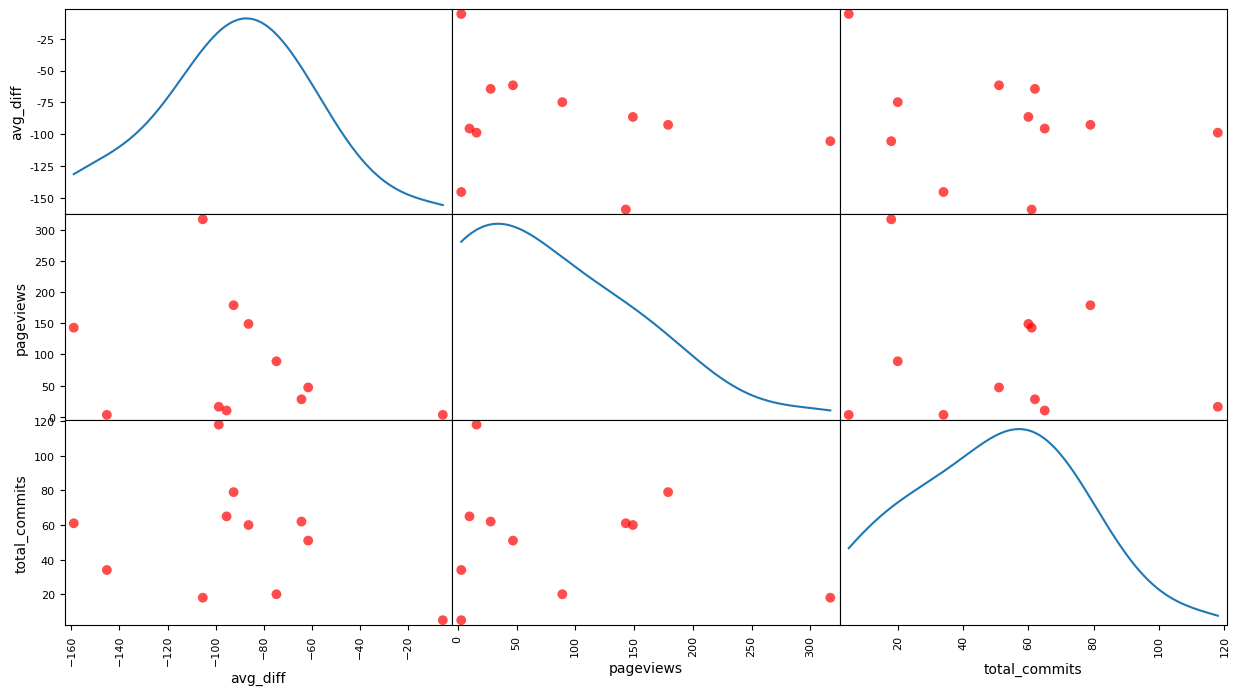

In [45]:
scatter_matrix(
    df,
    alpha=0.7,
    figsize=(15, 8),
    diagonal='kde',
    s=200,
    color='red'
)